## **Adat beolvasás**

In [1]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("ag_news")

df_train = dataset["train"].to_pandas()
print(df_train.head())

df_test = dataset["test"].to_pandas()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2


## **Vizualizáció**

In [2]:
# Feltételezve, hogy a DataFrame neve df, és a címke oszlopa 'label'
category_counts = df_train['label'].value_counts().sort_index()

# Kategória címkék hozzárendelése (az ag_news-ban 0: World, 1: Sports, 2: Business, 3: Sci/Tech)
category_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
category_counts.index = category_counts.index.map(category_names)

/tmp/ipython-input-1243568988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


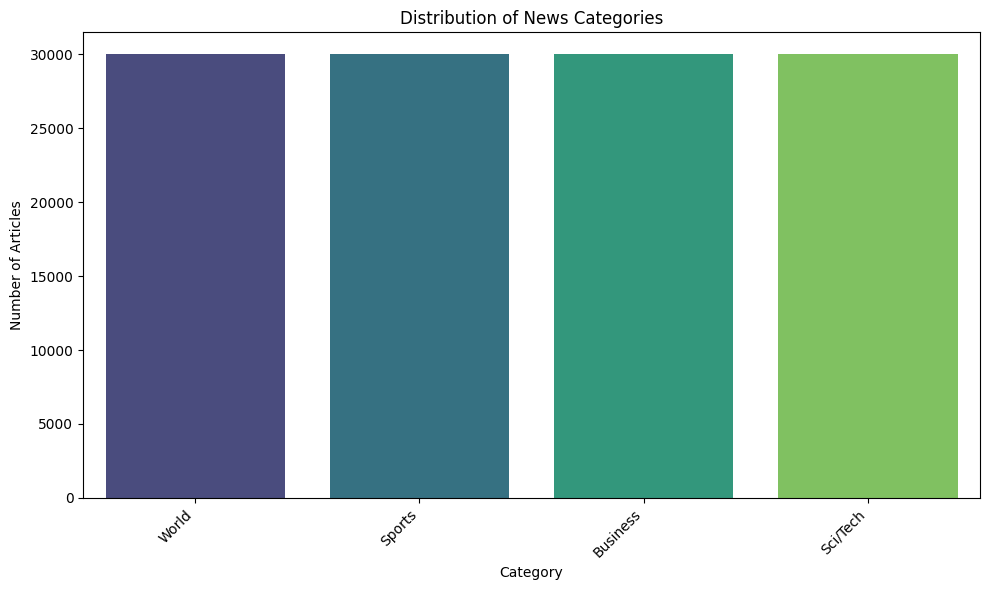

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **szövegtisztítás, tokenizáció**

In [4]:
#kisbetűs

df_train['text_lower'] = df_train['text'].str.lower()
print(df_train[['text', 'text_lower']].head())

                                                text  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                          text_lower  
0  wall st. bears claw back into the black (reute...  
1  carlyle looks toward commercial aerospace (reu...  
2  oil and economy cloud stocks' outlook (reuters...  
3  iraq halts oil exports from main southern pipe...  
4  oil prices soar to all-time record, posing new...  


In [5]:
#írásjelek eltávolítása

import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df_train['text_no_punctuation'] = df_train['text_lower'].apply(remove_punctuation)
print(df_train[['text_lower', 'text_no_punctuation']].head())

                                          text_lower  \
0  wall st. bears claw back into the black (reute...   
1  carlyle looks toward commercial aerospace (reu...   
2  oil and economy cloud stocks' outlook (reuters...   
3  iraq halts oil exports from main southern pipe...   
4  oil prices soar to all-time record, posing new...   

                                 text_no_punctuation  
0  wall st bears claw back into the black reuters...  
1  carlyle looks toward commercial aerospace reut...  
2  oil and economy cloud stocks outlook reuters r...  
3  iraq halts oil exports from main southern pipe...  
4  oil prices soar to alltime record posing new m...  


In [6]:
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df_train['text_no_numbers'] = df_train['text_no_punctuation'].apply(remove_numbers)
print(df_train[['text_no_punctuation', 'text_no_numbers']].head())

                                 text_no_punctuation  \
0  wall st bears claw back into the black reuters...   
1  carlyle looks toward commercial aerospace reut...   
2  oil and economy cloud stocks outlook reuters r...   
3  iraq halts oil exports from main southern pipe...   
4  oil prices soar to alltime record posing new m...   

                                     text_no_numbers  
0  wall st bears claw back into the black reuters...  
1  carlyle looks toward commercial aerospace reut...  
2  oil and economy cloud stocks outlook reuters r...  
3  iraq halts oil exports from main southern pipe...  
4  oil prices soar to alltime record posing new m...  


In [7]:
import nltk
from nltk.tokenize import word_tokenize

# Letöltjük a szükséges NLTK csomagokat
nltk.download('punkt')
nltk.download('punkt_tab') # A korábbi hiba miatt hozzáadva

df_train['text_tokens'] = df_train['text_no_numbers'].apply(word_tokenize)
print(df_train[['text_no_numbers', 'text_tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                     text_no_numbers  \
0  wall st bears claw back into the black reuters...   
1  carlyle looks toward commercial aerospace reut...   
2  oil and economy cloud stocks outlook reuters r...   
3  iraq halts oil exports from main southern pipe...   
4  oil prices soar to alltime record posing new m...   

                                         text_tokens  
0  [wall, st, bears, claw, back, into, the, black...  
1  [carlyle, looks, toward, commercial, aerospace...  
2  [oil, and, economy, cloud, stocks, outlook, re...  
3  [iraq, halts, oil, exports, from, main, southe...  
4  [oil, prices, soar, to, alltime, record, posin...  


In [8]:
from nltk.corpus import stopwords

# Letöltjük a stop word listát, ha még nincs meg
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df_train['text_no_stopwords'] = df_train['text_tokens'].apply(remove_stopwords)
print(df_train[['text_tokens', 'text_no_stopwords']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                         text_tokens  \
0  [wall, st, bears, claw, back, into, the, black...   
1  [carlyle, looks, toward, commercial, aerospace...   
2  [oil, and, economy, cloud, stocks, outlook, re...   
3  [iraq, halts, oil, exports, from, main, southe...   
4  [oil, prices, soar, to, alltime, record, posin...   

                                   text_no_stopwords  
0  [wall, st, bears, claw, back, black, reuters, ...  
1  [carlyle, looks, toward, commercial, aerospace...  
2  [oil, economy, cloud, stocks, outlook, reuters...  
3  [iraq, halts, oil, exports, main, southern, pi...  
4  [oil, prices, soar, alltime, record, posing, n...  


In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tag import pos_tag
from nltk.corpus import wordnet

# Letöltjük a szükséges NLTK csomagokat a lemmatizáláshoz
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng') # A POS tagginghez szükséges (javítva a korábbi hibára)

# Lemmatizálás
lemmatizer = WordNetLemmatizer()

# Funkció a WordNet POS tag konvertálására
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Alapértelmezettként főnév, ha nem található

def lemmatize_tokens(tokens):
    lemmatized_words = []
    # POS tagging a tokeneken
    tagged_tokens = pos_tag(tokens)
    for word, tag in tagged_tokens:
        w_pos = get_wordnet_pos(tag)
        lemmatized_words.append(lemmatizer.lemmatize(word, pos=w_pos))
    return lemmatized_words

df_train['text_lemmatized'] = df_train['text_no_stopwords'].apply(lemmatize_tokens)
print('Lemmatizált szövegek:')
print(df_train[['text_no_stopwords', 'text_lemmatized']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Lemmatizált szövegek:
                                   text_no_stopwords  \
0  [wall, st, bears, claw, back, black, reuters, ...   
1  [carlyle, looks, toward, commercial, aerospace...   
2  [oil, economy, cloud, stocks, outlook, reuters...   
3  [iraq, halts, oil, exports, main, southern, pi...   
4  [oil, prices, soar, alltime, record, posing, n...   

                                     text_lemmatized  
0  [wall, st, bear, claw, back, black, reuters, r...  
1  [carlyle, look, toward, commercial, aerospace,...  
2  [oil, economy, cloud, stock, outlook, reuters,...  
3  [iraq, halt, oil, export, main, southern, pipe...  
4  [oil, price, soar, alltime, record, pose, new,...  


## **Vektorizáció**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# A lemmatizált tokenekből újra stringet kell csinálnunk a TF-IDF számára
df_train['text_processed'] = df_train['text_lemmatized'].apply(lambda x: ' '.join(x))

# Inicializáljuk a TF-IDF vektorizálót
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Megadhatjuk a maximális szószámot

# Alkalmazzuk a vektorizációt a feldolgozott szövegre
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['text_processed'])

print("A TF-IDF vektorizált adatok alakja (minta x jellemző): ", X_train_tfidf.shape)
print("Az első 5 jellemző neve: ", tfidf_vectorizer.get_feature_names_out()[:50])

A TF-IDF vektorizált adatok alakja (minta x jellemző):  (120000, 5000)
Az első 5 jellemző neve:  ['aaron' 'abandon' 'abbas' 'abbey' 'abc' 'abduct' 'abdullah' 'ability'
 'able' 'aboard' 'abroad' 'absence' 'abu' 'abuja' 'abuse' 'ac' 'academic'
 'academy' 'acc' 'accelerate' 'accept' 'accepts' 'access' 'accident'
 'accord' 'account' 'accounting' 'accusation' 'accuse' 'ace' 'achieve'
 'acknowledge' 'acquire' 'acquisition' 'acquit' 'acrobat' 'across' 'act'
 'action' 'activate' 'active' 'activist' 'activity' 'actor' 'actually'
 'ad' 'adam' 'adapter' 'add' 'addition']


## **feature engineering**/jellemzőtervezés

In [11]:
from collections import Counter

# Calculate unique tokens per category
unique_tokens_per_category = {}
for label in df_train['label'].unique():
    # Get all lemmatized tokens for the current category
    category_tokens = [token for sublist in df_train[df_train['label'] == label]['text_lemmatized'] for token in sublist]
    # Count unique tokens
    unique_tokens_per_category[label] = len(set(category_tokens))

# Map numerical labels to category names for better readability
category_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
unique_tokens_named = {category_names[k]: v for k, v in unique_tokens_per_category.items()}

print("Number of unique tokens per category:")
for name, count in unique_tokens_named.items():
    print(f"- {name}: {count}")

# Create a new feature column in df_train
# This column will store the total number of unique tokens found in the category that each specific article belongs to
df_train['category_unique_token_count'] = df_train['label'].map(unique_tokens_per_category)

print("\nDataFrame with new feature 'category_unique_token_count' (one entry per category to demonstrate correct mapping):")
print(df_train[['label', 'text_lemmatized', 'category_unique_token_count']].groupby('label').head(1))

Number of unique tokens per category:
- Business: 30809
- Sci/Tech: 37429
- Sports: 30179
- World: 31138

DataFrame with new feature 'category_unique_token_count' (one entry per category to demonstrate correct mapping):
     label                                    text_lemmatized  \
0        2  [wall, st, bear, claw, back, black, reuters, r...   
78       3  [madden, espn, football, score, different, way...   
448      1  [phelps, thorpe, advance, freestyle, ap, ap, m...   
492      0  [venezuelan, vote, early, referendum, chavez, ...   

     category_unique_token_count  
0                          30809  
78                         37429  
448                        30179  
492                        31138  


## **training, validation, and test data preparation**

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# 1. PREPARE THE FULL FEATURE SET (X) and LABELS (Y)

# Assuming df_train with 'text_lemmatized' and 'category_unique_token_count' are available from previous cells
# Assuming X_train_tfidf (from TF-IDF vectorization) is available from the vectorization cell

# Y: Labels
Y = df_train['label'].values

# Ensure the engineered feature is in a 2D array format for hstack
category_feature = df_train['category_unique_token_count'].values.reshape(-1, 1)

# Combine TF-IDF features with the engineered feature
X = hstack([X_train_tfidf, category_feature]).tocsr() # Corrected variable name X_train_tfidf

# 2. SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SETS
# The split: 80% Training, 20% Validation (test_size=0.2)
# random_state: Fixes the split for reproducibility.
# stratify=Y: Ensures class proportions are maintained in both sets.
X_train, X_val, Y_train, Y_val = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

# 3. df_test has been loaded in the initial data loading cell
# IMPORTANT: The test data will need to undergo the SAME preprocessing and vectorization steps
# as the training data, using the SAME tfidf_vectorizer and lemmatizer objects. (This will be done later)


# Print the shapes of the resulting datasets:
print(f"Shape of X_train (features for training): {X_train.shape}")
print(f"Shape of Y_train (labels for training): {Y_train.shape}")
print(f"Shape of X_val (features for validation): {X_val.shape}")
print(f"Shape of Y_val (labels for validation): {Y_val.shape}")
print(f"Number of articles in original df_test: {df_test.shape[0]}")

Shape of X_train (features for training): (96000, 5001)
Shape of Y_train (labels for training): (96000,)
Shape of X_val (features for validation): (24000, 5001)
Shape of Y_val (labels for validation): (24000,)
Number of articles in original df_test: 7600


## **Vizualizáció** a letisztult szövegről

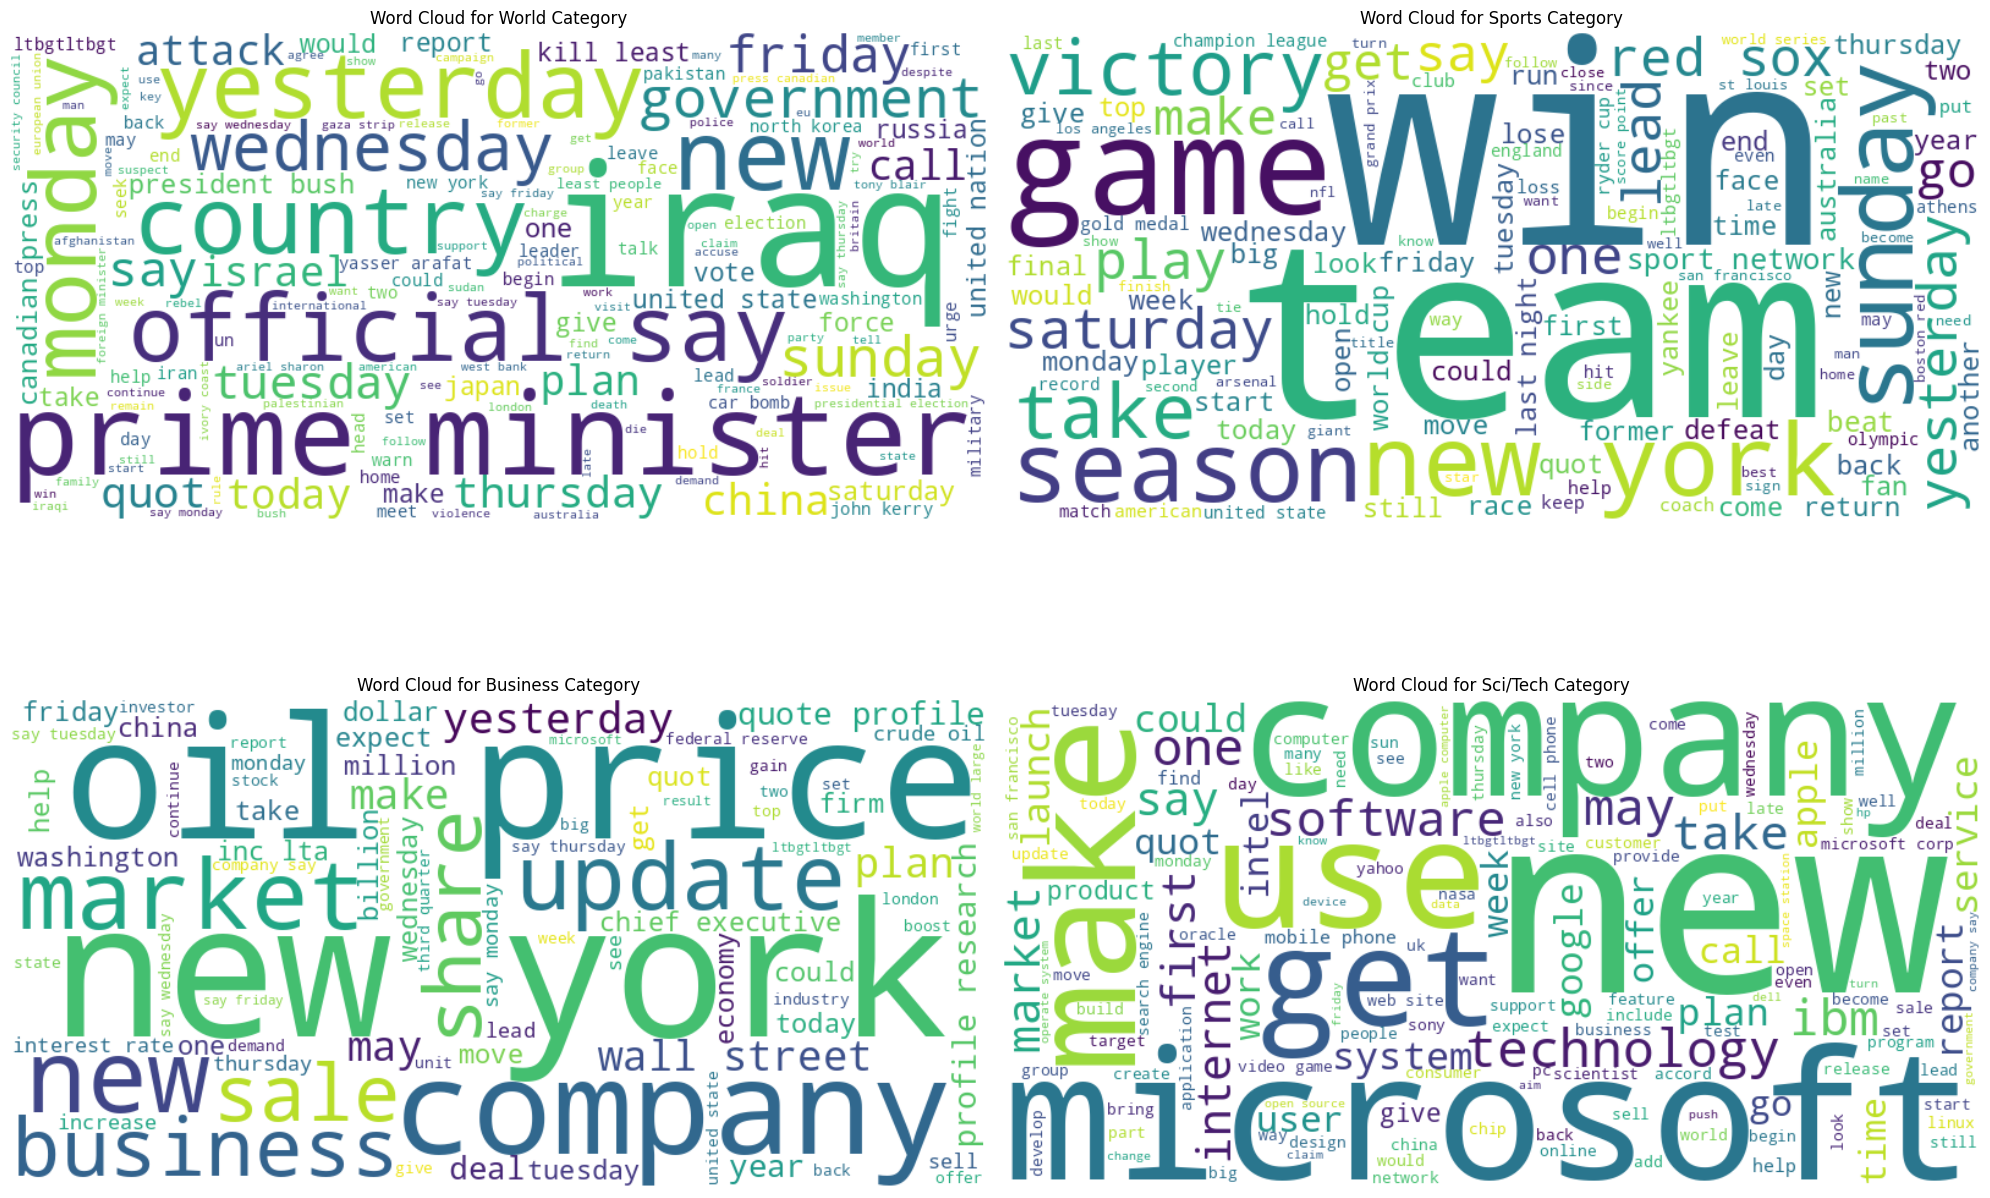

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Assuming df_train with 'text_lemmatized' and 'label' columns are available
# and category_names is defined (from previous cells)
category_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

# Define the stop_words set with custom additions as per the final desired state from previous cells
# Ensure NLTK data is downloaded for consistency
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

custom_stopwords = set(stopwords.words('english'))
custom_stopwords.add('39s')
custom_stopwords.add('ap')
custom_stopwords.add('afp')
custom_stopwords.add('u')
# Add 'reuters' and 'reuter' to custom stopwords to remove them from word clouds
custom_stopwords.add('reuters')
custom_stopwords.add('reuter')

# Ensure 'us' is not in custom_stopwords if we want to retain it
if 'us' in custom_stopwords:
    custom_stopwords.remove('us')

# Add any additional stopwords from WordCloud's default list if desired, though our custom one is more specific
# For simplicity, we'll just use our custom_stopwords set here.


fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, (label, name) in enumerate(category_names.items()):
    # Filter data for the current category
    category_df = df_train[df_train['label'] == label]

    # Flatten the list of lemmatized tokens for the category and join into a single string
    all_category_text = " ".join([token for sublist in category_df['text_lemmatized'] for token in sublist])

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=custom_stopwords, min_font_size=10).generate(all_category_text)

    # Display the generated image:
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {name} Category')
    axes[i].axis('off') # Hide the axes

plt.tight_layout()
plt.show()

## **UnitTest**

In [14]:
import unittest
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK data is downloaded for tests
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

# Define the preprocessing functions, mirroring those in the notebook
# (using sample functions for testing purposes)
def to_lower_func(text):
    return text.lower()

def remove_punctuation_func(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def tokenize_words_func(text):
    return word_tokenize(text)

# Define the stop_words set with custom additions as per the final desired state
custom_stop_words = set(stopwords.words('english'))
custom_stop_words.add('39s') # for apostrophes like 's if they became a token
custom_stop_words.add('ap')
custom_stop_words.add('afp')
custom_stop_words.add('u')   # to remove standalone 'u'

# Ensure 'us' is not in custom_stop_words, as user wants to retain it as 'us'
if 'us' in custom_stop_words:
    custom_stop_words.remove('us')

def remove_custom_stopwords_func(tokens):
    return [word for word in tokens if word not in custom_stop_words]

lemmatizer_for_test = WordNetLemmatizer()
def lemmatize_tokens_custom_func(tokens):
    processed_tokens = []
    for word in tokens:
        # Special handling for 'us': keep it as 'us', do not lemmatize to 'u'
        if word == 'us':
            processed_tokens.append('us')
        else:
            processed_tokens.append(lemmatizer_for_test.lemmatize(word))
    return processed_tokens

class TestPreprocessingPipeline(unittest.TestCase):

    def setUp(self):
        # A sample text designed to test all aspects of the preprocessing pipeline
        self.sample_text = "Wall St. Bears Claw Back Into the Black (Reuters) US economy. It's a new AP AFP u story. The 39s." # Added 39s for specific test case
        self.initial_df = pd.DataFrame([{'text': self.sample_text}])

    def test_01_lowercasing(self):
        df_temp = self.initial_df.copy()
        df_temp['text_lower'] = df_temp['text'].apply(to_lower_func)
        expected = "wall st. bears claw back into the black (reuters) us economy. it's a new ap afp u story. the 39s."
        self.assertEqual(df_temp['text_lower'].iloc[0], expected, "Lowercasing failed.")

    def test_02_punctuation_removal(self):
        df_temp = self.initial_df.copy()
        df_temp['text_lower'] = df_temp['text'].apply(to_lower_func)
        df_temp['text_no_punctuation'] = df_temp['text_lower'].apply(remove_punctuation_func)
        expected = "wall st bears claw back into the black reuters us economy its a new ap afp u story the 39s"
        self.assertEqual(df_temp['text_no_punctuation'].iloc[0], expected, "Punctuation removal failed.")

    def test_03_word_tokenization(self):
        df_temp = self.initial_df.copy()
        df_temp['text_lower'] = df_temp['text'].apply(to_lower_func)
        df_temp['text_no_punctuation'] = df_temp['text_lower'].apply(remove_punctuation_func)
        df_temp['text_tokens'] = df_temp['text_no_punctuation'].apply(tokenize_words_func)
        expected = ['wall', 'st', 'bears', 'claw', 'back', 'into', 'the', 'black', 'reuters', 'us', 'economy', 'its', 'a', 'new', 'ap', 'afp', 'u', 'story', 'the', '39s']
        self.assertEqual(df_temp['text_tokens'].iloc[0], expected, "Tokenization failed.")

    def test_04_stopword_removal(self):
        df_temp = self.initial_df.copy()
        df_temp['text_lower'] = df_temp['text'].apply(to_lower_func)
        df_temp['text_no_punctuation'] = df_temp['text_lower'].apply(remove_punctuation_func)
        df_temp['text_tokens'] = df_temp['text_no_punctuation'].apply(tokenize_words_func)
        df_temp['text_no_stopwords'] = df_temp['text_tokens'].apply(remove_custom_stopwords_func)
        # 'into', 'the', 'a', 'its' (standard NLTK stopwords) should be removed.
        # 'ap', 'afp', 'u', '39s' (custom stopwords) should be removed.
        # 'us' should remain, as it was explicitly removed from custom_stop_words.
        expected = ['wall', 'st', 'bears', 'claw', 'back', 'black', 'reuters', 'us', 'economy', 'new', 'story']
        self.assertEqual(df_temp['text_no_stopwords'].iloc[0], expected, "Stopword removal failed or 'us' was incorrectly removed.")

    def test_05_lemmatization(self):
        df_temp = self.initial_df.copy()
        df_temp['text_lower'] = df_temp['text'].apply(to_lower_func)
        df_temp['text_no_punctuation'] = df_temp['text_lower'].apply(remove_punctuation_func)
        df_temp['text_tokens'] = df_temp['text_no_punctuation'].apply(tokenize_words_func)
        df_temp['text_no_stopwords'] = df_temp['text_tokens'].apply(remove_custom_stopwords_func)
        df_temp['text_lemmatized'] = df_temp['text_no_stopwords'].apply(lemmatize_tokens_custom_func)
        # 'bears' -> 'bear'
        # 'economy' and 'story' should remain (already base form)
        # 'us' should remain 'us' (due to custom lemmatizer logic)
        expected = ['wall', 'st', 'bear', 'claw', 'back', 'black', 'reuters', 'us', 'economy', 'new', 'story']
        self.assertEqual(df_temp['text_lemmatized'].iloc[0], expected, "Lemmatization failed or 'us' was incorrectly lemmatized to 'u'.")

# To run the tests, call this function.
# argv=['first-arg-is-ignored'] and exit=False are for running in environments like Colab
# without causing the interpreter to exit.
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


## **Modell betanítása és kiértékelése**

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train, Y_train)

print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


In [16]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
Y_pred_mnb = mnb_model.predict(X_val)

# Print the classification report
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(Y_val, Y_pred_mnb))

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6000
           1       0.94      0.97      0.96      6000
           2       0.88      0.86      0.87      6000
           3       0.88      0.88      0.88      6000

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



## **Complex benchmarking**

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tag import pos_tag
from nltk.corpus import wordnet

# Ensure NLTK data is downloaded (redundant but safe if notebook was reset)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

# Re-define preprocessing functions and objects if they are not globally accessible (they should be, but for robustness)
# Lowercasing is done directly with .str.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# The stop_words set used during training
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_tokens(tokens):
    lemmatized_words = []
    tagged_tokens = pos_tag(tokens)
    for word, tag in tagged_tokens:
        w_pos = get_wordnet_pos(tag)
        lemmatized_words.append(lemmatizer.lemmatize(word, pos=w_pos))
    return lemmatized_words

# Apply preprocessing steps to df_test
df_test['text_lower'] = df_test['text'].str.lower()
df_test['text_no_punctuation'] = df_test['text_lower'].apply(remove_punctuation)
df_test['text_no_numbers'] = df_test['text_no_punctuation'].apply(remove_numbers)
df_test['text_tokens'] = df_test['text_no_numbers'].apply(word_tokenize)
df_test['text_no_stopwords'] = df_test['text_tokens'].apply(remove_stopwords)
df_test['text_lemmatized'] = df_test['text_no_stopwords'].apply(lemmatize_tokens)

# Join the lemmatized tokens back into a string for TF-IDF vectorization
df_test['text_processed'] = df_test['text_lemmatized'].apply(lambda x: ' '.join(x))

print("Preprocessing of df_test completed. Displaying head of processed text:")
print(df_test[['text', 'text_processed']].head())

Preprocessing of df_test completed. Displaying head of processed text:
                                                text  \
0  Fears for T N pension after talks Unions repre...   
1  The Race is On: Second Private Team Sets Launc...   
2  Ky. Company Wins Grant to Study Peptides (AP) ...   
3  Prediction Unit Helps Forecast Wildfires (AP) ...   
4  Calif. Aims to Limit Farm-Related Smog (AP) AP...   

                                      text_processed  
0  fear n pension talk union represent worker tur...  
1  race second private team set launch date human...  
2  ky company win grant study peptide ap ap compa...  
3  prediction unit help forecast wildfire ap ap b...  
4  calif aim limit farmrelated smog ap ap souther...  


In [18]:
from scipy.sparse import hstack
from sklearn.metrics import classification_report

# 1. Create 'category_unique_token_count' in df_test
# The unique_tokens_per_category dictionary should be available from previous cells
# (e.g., {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}) from df_train analysis
df_test['category_unique_token_count'] = df_test['label'].map(unique_tokens_per_category)

# 2. Vectorize 'text_processed' from df_test using the already fitted tfidf_vectorizer
X_test_tfidf = tfidf_vectorizer.transform(df_test['text_processed'])

# 3. Reshape the 'category_unique_token_count' column from df_test into a 2D array
category_feature_test = df_test['category_unique_token_count'].values.reshape(-1, 1)

# 4. Combine X_test_tfidf with the reshaped 'category_unique_token_count'
X_test_combined = hstack([X_test_tfidf, category_feature_test]).tocsr()

# 5. Use the trained mnb_model to make predictions on X_test_combined
Y_pred_test = mnb_model.predict(X_test_combined)

# 6. Generate and print a classification report
print("\nMultinomial Naive Bayes Classification Report on Test Set:")
print(classification_report(df_test['label'], Y_pred_test))



Multinomial Naive Bayes Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1900
           1       0.94      0.97      0.96      1900
           2       0.86      0.84      0.85      1900
           3       0.87      0.88      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



<Figure size 1000x800 with 0 Axes>

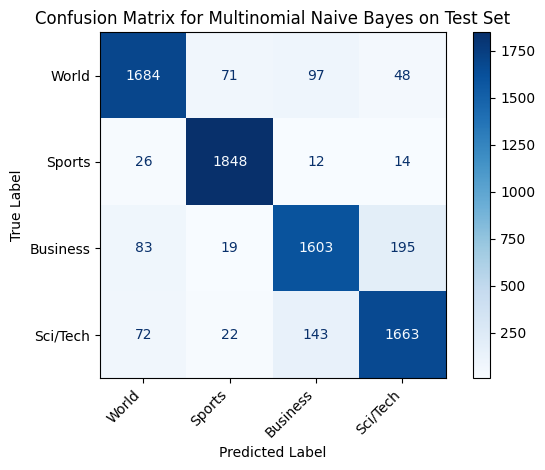

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Map numerical labels to category names for better readability in the plot
category_names_list = [category_names[i] for i in sorted(category_names.keys())]

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(
    df_test['label'], Y_pred_test,
    display_labels=category_names_list,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix for Multinomial Naive Bayes on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Adatok előkészítése későbbi keresésre**

In [20]:
# Hozd létre a kategorizált eredményt
categorized_data = df_test[['text']].copy()
# A Y_pred_test a Multinomial Naive Bayes predikciója
categorized_data['predicted_label'] = Y_pred_test

# Címkék konvertálása nevekkel a könnyebb kereshetőség érdekében
category_names = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
categorized_data['predicted_category'] = categorized_data['predicted_label'].map(category_names)

# Kereshető adatbázis megtekintése
print(categorized_data.head())

                                                text  predicted_label  \
0  Fears for T N pension after talks Unions repre...                2   
1  The Race is On: Second Private Team Sets Launc...                3   
2  Ky. Company Wins Grant to Study Peptides (AP) ...                3   
3  Prediction Unit Helps Forecast Wildfires (AP) ...                3   
4  Calif. Aims to Limit Farm-Related Smog (AP) AP...                3   

  predicted_category  
0           Business  
1           Sci/Tech  
2           Sci/Tech  
3           Sci/Tech  
4           Sci/Tech  


## **Kulcsszó alapján keresés**

In [22]:
user_keyword_phrase_input = input("Write your keyword phrase: ")
user_keyword_phrase = user_keyword_phrase_input.strip()

# Preprocessing the user's query
# Use the same preprocessing functions defined earlier
# (Assuming remove_punctuation, remove_numbers, word_tokenize, remove_stopwords, lemmatize_tokens are defined in previous cells)

# 1. Lowercasing
processed_user_keywords = user_keyword_phrase.lower()

# 2. Punctuation removal
processed_user_keywords = remove_punctuation(processed_user_keywords)

# 3. Number removal
processed_user_keywords = remove_numbers(processed_user_keywords)

# 4. Tokenization
processed_user_keywords_tokens = word_tokenize(processed_user_keywords)

# 5. Stopword removal (using the same stop_words set)
processed_user_keywords_tokens = remove_stopwords(processed_user_keywords_tokens)

# 6. Lemmatization (using the same lemmatizer and get_wordnet_pos function)
processed_user_keywords_tokens = lemmatize_tokens(processed_user_keywords_tokens)

# Join the processed tokens back into a string for easier searching
processed_query_string = ' '.join(processed_user_keywords_tokens)

print(f"Original Query: '{user_keyword_phrase}'")
print(f"Processed Query: '{processed_query_string}'")

# Function to search for articles containing any of the processed query terms
def search_articles(df, query_terms):
    search_results = pd.DataFrame(columns=df.columns)
    for term in query_terms:
        # Case-insensitive search for the term in the 'text' column
        # Using .str.contains with regex=False for simple substring matching
        # You might consider more advanced indexing for large datasets
        filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
        search_results = pd.concat([search_results, filtered_df]).drop_duplicates().reset_index(drop=True)
    return search_results

# Perform the search on categorized_data
search_terms = processed_query_string.split() # Split the processed string into individual terms to search for any of them
results = search_articles(categorized_data, search_terms)

print(f"\nSearch Results for articles containing '{' OR '.join(search_terms)}':")
if not results.empty:
    print(results.head())
    print(f"Found {len(results)} matching articles.")
else:
    print("No matching articles found.")

# --- Interactive Category and Keyword Search ---
print("\n--- Interactive Category and Keyword Search ---")
user_category_input = input("Choose a category (World, Sports, Business, or Sci/Tech): ")
user_category = user_category_input.strip() # Corrected: call .strip() as a function
user_keyword_for_category_input = input("Write your keyword for the category: ") # Added _input suffix for clarity
user_keyword_for_category = user_keyword_for_category_input.strip() # Corrected: call .strip() as a function

# Map category name to numerical label for filtering
# Invert the dictionary to map name to label
category_names_inverted = {v: k for k, v in category_names.items()}
predicted_label_for_search = category_names_inverted.get(user_category, None)

if predicted_label_for_search is None:
    print(f"Invalid category: {user_category}. Please choose from World, Sports, Business, or Sci/Tech.")
else:
    # Preprocess the user's keyword for category search
    processed_cat_keyword = user_keyword_for_category.lower()
    processed_cat_keyword = remove_punctuation(processed_cat_keyword)
    processed_cat_keyword = remove_numbers(processed_cat_keyword)
    processed_cat_keyword_tokens = word_tokenize(processed_cat_keyword)
    processed_cat_keyword_tokens = remove_stopwords(processed_cat_keyword_tokens)
    processed_cat_keyword_tokens = lemmatize_tokens(processed_cat_keyword_tokens)
    processed_cat_keyword_string = ' '.join(processed_cat_keyword_tokens)

    # Filter by predicted category first
    filtered_by_category = categorized_data[categorized_data['predicted_label'] == predicted_label_for_search]

    # Then search for the processed keyword within that category
    cat_search_results = pd.DataFrame(columns=categorized_data.columns)
    if processed_cat_keyword_string: # Only search if there's a processed keyword
        for term in processed_cat_keyword_string.split():
            keyword_filtered_df = filtered_by_category[filtered_by_category['text'].str.contains(term, case=False, na=False)]
            cat_search_results = pd.concat([cat_search_results, keyword_filtered_df]).drop_duplicates().reset_index(drop=True)
    else:
        cat_search_results = filtered_by_category # If no keyword, return all articles in the category

    print(f"\nSearch Results for '{user_keyword_for_category}' in the '{user_category}' category:")
    if not cat_search_results.empty:
        print(cat_search_results.head())
        print(f"Found {len(cat_search_results)} '{user_category}' articles containing '{user_keyword_for_category}'.")
    else:
        print(f"No matching '{user_category}' articles containing '{user_keyword_for_category}' found.")

Write your keyword phrase: oil prices
Original Query: 'oil prices'
Processed Query: 'oil price'

Search Results for articles containing 'oil OR price':
                                                text predicted_label  \
0  Venezuela Prepares for Chavez Recall Vote Supp...               0   
1  Dollar Briefly Hits 4-Wk Low Vs Euro  LONDON (...               2   
2  Home Depot Likes High Oil Rising fuel prices, ...               2   
3  Oil prices bubble to record high The price of ...               2   
4  Oil Sets New Record \$47 on Iraq Threat  LONDO...               2   

  predicted_category  
0              World  
1           Business  
2           Business  
3           Business  
4           Business  
Found 430 matching articles.

--- Interactive Category and Keyword Search ---
Choose a category (World, Sports, Business, or Sci/Tech): Sports
Write your keyword for the category: horse

Search Results for 'horse' in the 'Sports' category:
                                     